# Step 1 - Climate Analysis and Exploration

- Use the provided starter notebook and hawaii.sqlite files to complete your climate analysis and data exploration.

- Choose a start date and end date for your trip. Make sure that your vacation range is approximately 3-15 days total.

- Use SQLAlchemy create_engine to connect to your sqlite database.

- Use SQLAlchemy automap_base() to reflect your tables into classes and save a reference to those classes called Station and Measurement.

In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd

In [3]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect

In [5]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [6]:
# reflect an existing database into a new model
Base = automap_base()

# reflect the tables
Base.prepare(engine, reflect=True)

In [7]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [8]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [9]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Precipitation Analysis

- Design a query to retrieve the last 12 months of precipitation data.

- Select only the date and prcp values.

- Load the query results into a Pandas DataFrame and set the index to the date column.

- Sort the DataFrame values by date.

- Plot the results using the DataFrame plot method.

In [10]:
# Inspecting the list of the column names for Measurement
inspector = inspect(engine)
inspector.get_table_names()
columns = inspector.get_columns('measurement')
for column in columns:
    print(column["name"], column["type"])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [11]:
# Inspecting the list of the column names for Station
inspector = inspect(engine)
inspector.get_table_names()
columns = inspector.get_columns('station')
for column in columns:
    print(column['name'], column['type'])

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


In [12]:
# Finding the last month of the precipitation data
last_month = engine.execute("SELECT date, prcp FROM measurement GROUP BY date, prcp ORDER BY date desc LIMIT 10")
# date = dt.datetime(2020,12,31)
for record in last_month:
    print(record)

('2017-08-23', 0.0)
('2017-08-23', 0.08)
('2017-08-23', 0.45)
('2017-08-22', 0.0)
('2017-08-22', 0.5)
('2017-08-21', None)
('2017-08-21', 0.0)
('2017-08-21', 0.02)
('2017-08-21', 0.56)
('2017-08-20', None)


In [13]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results
    
# Calculate the date 1 year ago from the last data point in the database
end_date = dt.datetime(2017,8,23)
begin_date = dt.datetime(2016,8,22)

precipitation_results = session.query(Measurement.date, Measurement.prcp).\
                                      filter(Measurement.date <= end_date).\
                                      filter(Measurement.date >= begin_date).\
                                      order_by(Measurement.date).all()

In [14]:
# Perform a query to retrieve the data and precipitation scores
for records in precipitation_results:
    print(records)

('2016-08-23', 0.0)
('2016-08-23', 0.15)
('2016-08-23', 0.05)
('2016-08-23', None)
('2016-08-23', 0.02)
('2016-08-23', 1.79)
('2016-08-23', 0.7)
('2016-08-24', 0.08)
('2016-08-24', 2.15)
('2016-08-24', 2.28)
('2016-08-24', None)
('2016-08-24', 1.22)
('2016-08-24', 2.15)
('2016-08-24', 1.45)
('2016-08-25', 0.08)
('2016-08-25', 0.08)
('2016-08-25', 0.0)
('2016-08-25', 0.0)
('2016-08-25', 0.21)
('2016-08-25', 0.06)
('2016-08-25', 0.11)
('2016-08-26', 0.0)
('2016-08-26', 0.03)
('2016-08-26', 0.02)
('2016-08-26', 0.04)
('2016-08-26', 0.0)
('2016-08-26', 0.01)
('2016-08-27', 0.0)
('2016-08-27', 0.18)
('2016-08-27', 0.02)
('2016-08-27', 0.0)
('2016-08-27', 0.12)
('2016-08-27', None)
('2016-08-28', 0.01)
('2016-08-28', 0.14)
('2016-08-28', 0.14)
('2016-08-28', 0.14)
('2016-08-28', 0.6)
('2016-08-28', 2.07)
('2016-08-29', 0.0)
('2016-08-29', 0.17)
('2016-08-29', 0.04)
('2016-08-29', None)
('2016-08-29', 0.0)
('2016-08-29', 0.35)
('2016-08-29', 0.9)
('2016-08-30', 0.0)
('2016-08-30', 0.0)
('2016

('2016-12-07', 0.0)
('2016-12-07', 0.17)
('2016-12-07', None)
('2016-12-07', None)
('2016-12-07', 0.07)
('2016-12-07', 0.12)
('2016-12-07', 0.02)
('2016-12-08', 0.03)
('2016-12-08', 0.03)
('2016-12-08', 0.02)
('2016-12-08', 0.27)
('2016-12-08', 0.01)
('2016-12-08', 0.07)
('2016-12-08', 0.03)
('2016-12-09', 0.52)
('2016-12-09', 0.34)
('2016-12-09', 0.26)
('2016-12-09', None)
('2016-12-09', 0.31)
('2016-12-09', 0.42)
('2016-12-10', 0.05)
('2016-12-10', 0.02)
('2016-12-10', 0.0)
('2016-12-10', None)
('2016-12-10', 0.02)
('2016-12-10', 0.04)
('2016-12-11', 0.04)
('2016-12-11', 0.02)
('2016-12-11', 0.06)
('2016-12-11', 0.0)
('2016-12-11', 0.13)
('2016-12-12', 0.01)
('2016-12-12', 0.01)
('2016-12-12', None)
('2016-12-12', 0.02)
('2016-12-12', 0.0)
('2016-12-12', 0.0)
('2016-12-12', 0.01)
('2016-12-13', 0.05)
('2016-12-13', 0.1)
('2016-12-13', 0.34)
('2016-12-13', None)
('2016-12-13', 0.15)
('2016-12-13', 0.04)
('2016-12-13', 0.09)
('2016-12-14', 0.03)
('2016-12-14', 0.05)
('2016-12-14', 0.12

('2017-05-15', 0.05)
('2017-05-15', 0.08)
('2017-05-15', None)
('2017-05-15', 0.06)
('2017-05-15', 0.09)
('2017-05-15', 0.6)
('2017-05-16', 0.01)
('2017-05-16', 0.03)
('2017-05-16', 0.05)
('2017-05-16', 0.0)
('2017-05-16', 0.03)
('2017-05-16', 0.3)
('2017-05-17', 0.0)
('2017-05-17', 0.02)
('2017-05-17', 0.0)
('2017-05-17', 0.0)
('2017-05-17', 0.07)
('2017-05-17', 0.06)
('2017-05-18', 0.01)
('2017-05-18', 0.09)
('2017-05-18', 0.16)
('2017-05-18', 0.46)
('2017-05-18', 0.13)
('2017-05-18', 0.0)
('2017-05-19', 0.0)
('2017-05-19', 0.02)
('2017-05-19', 0.01)
('2017-05-19', 0.01)
('2017-05-20', 0.0)
('2017-05-20', 0.0)
('2017-05-20', 0.01)
('2017-05-20', None)
('2017-05-20', 0.02)
('2017-05-20', None)
('2017-05-21', 0.0)
('2017-05-21', 0.0)
('2017-05-21', 0.0)
('2017-05-21', 0.01)
('2017-05-21', 0.0)
('2017-05-22', 0.0)
('2017-05-22', 0.0)
('2017-05-22', None)
('2017-05-22', 0.0)
('2017-05-22', 0.06)
('2017-05-22', 0.3)
('2017-05-23', 0.08)
('2017-05-23', 0.02)
('2017-05-23', 0.11)
('2017-05-

('2017-08-15', 0.06)
('2017-08-15', 0.32)
('2017-08-15', 0.42)
('2017-08-16', 0.0)
('2017-08-16', 0.07)
('2017-08-16', 0.12)
('2017-08-16', 0.42)
('2017-08-17', 0.0)
('2017-08-17', 0.05)
('2017-08-17', 0.01)
('2017-08-17', 0.13)
('2017-08-18', 0.0)
('2017-08-18', 0.0)
('2017-08-18', 0.06)
('2017-08-18', None)
('2017-08-19', 0.0)
('2017-08-19', 0.0)
('2017-08-19', None)
('2017-08-19', 0.09)
('2017-08-20', 0.0)
('2017-08-20', 0.01)
('2017-08-20', None)
('2017-08-21', 0.0)
('2017-08-21', 0.02)
('2017-08-21', None)
('2017-08-21', 0.56)
('2017-08-22', 0.0)
('2017-08-22', 0.0)
('2017-08-22', 0.5)
('2017-08-23', 0.0)
('2017-08-23', 0.0)
('2017-08-23', 0.08)
('2017-08-23', 0.45)


In [15]:
# Save the query results as a Pandas DataFrame and set the index to the date column
precipitation_results_df = pd.DataFrame(precipitation_results)

In [16]:
# Sort the dataframe by date
precipitation_results_df.sort_index(ascending=True)
precipitation_results_df.dropna().head()

,date,prcp
0,2016-08-23,0.00
1,2016-08-23,0.15
2,2016-08-23,0.05
4,2016-08-23,0.02
5,2016-08-23,1.79


In [17]:
# Set the index to the date column
precipitation_results_df.set_index('date').dropna().head()

,prcp
date,
2016-08-23,0.00
2016-08-23,0.15
2016-08-23,0.05
2016-08-23,0.02
2016-08-23,1.79


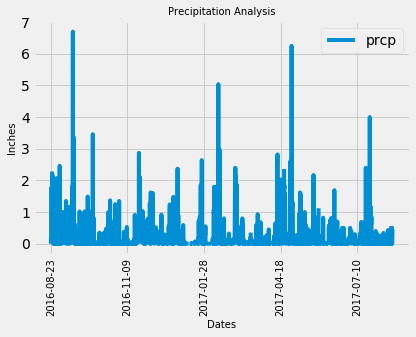

<Figure size 864x576 with 0 Axes>

In [18]:
# Use Pandas Plotting with Matplotlib to plot the data
# precipitation_results_df = precipitation_results_df.astype(float)

# precipitation_results_df.plot.bar('date','prcp')
# plt.xlabel("Dates")
# plt.ylabel("Inches")
# plt.title("Precipitation Analysis")
# plt.xticks(rotation=90)
# plt.tight_layout() 
# plt.show()

precipitation_results_df.plot('date','prcp')
plt.xlabel("Dates", fontsize=10)
plt.ylabel("Inches", fontsize=10)
plt.title("Precipitation Analysis", fontsize=10)
plt.xticks(rotation=90, fontsize=10)
plt.figure(figsize=(12,8))
plt.tight_layout() 
plt.show()

In [19]:
# Use Pandas to calcualte the summary statistics for the precipitation data

# count = precipitation_results_df["prcp"].count()
# print(f'Count of Precipitation In A Year: {count}.')

# mean = precipitation_results_df["prcp"].mean()
# print(f'Mean of the precipitation data is {mean}.')

# median = precipitation_results_df["prcp"].median()
# print(f'Median of the precipitation data is {median}.')

# maximum = precipitation_results_df["prcp"].max()
# print(f'Maximum number of precipitation data is {maximum}.')

# minimum = precipitation_results_df["prcp"].min()
# print(f'Minimum number of precipitation data is {minimum}.')

# summary_statistics = precipitation_results_df.describe()
# print(f'Summary statistics of the precipitation data: {summary_statistics}.')

precipitation_results_df.describe().rename(columns={"prcp":"precipitation"})

,precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Station Analysis

- Design a query to calculate the total number of stations.

- Design a query to find the most active stations.
  1. List the stations and observation counts in descending order.

  2. Which station has the highest number of observations?

  3. ***Hint: You will need to use a function such as func.min, func.max, func.avg, and func.count in your queries.


- Design a query to retrieve the last 12 months of temperature observation data (TOBS).
  1. Filter by the station with the highest number of observations.

  2. Plot the results as a histogram with bins=12.

In [20]:
# Design a query to show how many stations are available in this dataset?
stations_count = session.query(func.count(Station.id)).scalar()
stations_count

9

In [21]:
stations = session.query(Station)
for station in stations:
    print(f"Stations Available: {station.station} | Names Of The Available Stations: {station.name}.")

Stations Available: USC00519397 | Names Of The Available Stations: WAIKIKI 717.2, HI US.
Stations Available: USC00513117 | Names Of The Available Stations: KANEOHE 838.1, HI US.
Stations Available: USC00514830 | Names Of The Available Stations: KUALOA RANCH HEADQUARTERS 886.9, HI US.
Stations Available: USC00517948 | Names Of The Available Stations: PEARL CITY, HI US.
Stations Available: USC00518838 | Names Of The Available Stations: UPPER WAHIAWA 874.3, HI US.
Stations Available: USC00519523 | Names Of The Available Stations: WAIMANALO EXPERIMENTAL FARM, HI US.
Stations Available: USC00519281 | Names Of The Available Stations: WAIHEE 837.5, HI US.
Stations Available: USC00511918 | Names Of The Available Stations: HONOLULU OBSERVATORY 702.2, HI US.
Stations Available: USC00516128 | Names Of The Available Stations: MANOA LYON ARBO 785.2, HI US.


In [22]:
# joining two data 

# join = [Station.station, Station.name, Station.latitude, Station.longitude, Station.elevation,
#         Measurement.station, Measurement.date, Measurement.prcp, Measurement.tobs]
# same_station = session.query(*join).filter(Station.station == Measurement.station).limit(10).all()

# for data in same_station:
#     (station_station, station_name, station_latitude, station_longitude, station_elevation,
#      measurement_station, measurement_date, measurement_prcp, measurement_tobs) = data
#     print(f"station: {station_station} | station: {measurement_station}")


In [23]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.

# Hint: You will need to use a function such as func.min, func.max, func.avg, and func.count in your queries.


# query = session.query(Station, func.count(Measurement.id))
# query = query.join(Measurement, Station.station == Measurement.station, isouter=True) 
# query = query.group_by(Station.station).filter(Station.station.like('USC%'))
# for (station, station_station_count) in query.all():
#     print(station, station_station_count)
# active_station = session.query(func.count(Station.id)).scalar()
# print(f'Active Station Available: {active_station}.')


# count = session.query(Station, func.count(Measurement.tobs))
# join = count.join(Measurement, Station.station == Measurement.station, isouter=True)
# query = join.group_by(Station.station).order_by(func.count(Measurement.tobs).desc()).filter(Station.station.like('USC%'))

# for (station, station_station_count) in query.all():
#     print(f"Station: {station.station}  |  Count:{station_station_count}")

# print(f"-----------------------------------------------------------------")
    
# print(f"Which station has the highest number of observations? USC00519281")


active_station = session.query(Measurement.station, func.count(Measurement.tobs)).group_by(Measurement.station).\
                        order_by(func.count(Measurement.tobs).desc()).all()
active_station

most_active_station = active_station[0][0] #first [] is the column of station and second [] is the column of tobs. 

for station, tobs in active_station:
    print(f"Station: {station} | Counts of Temperature Observations: {tobs}.")

print(f"-------------------------------------------------------------------")    
print(f"The most active station is {most_active_station} | count is {active_station[0][1]}")

Station: USC00519281 | Counts of Temperature Observations: 2772.
Station: USC00519397 | Counts of Temperature Observations: 2724.
Station: USC00513117 | Counts of Temperature Observations: 2709.
Station: USC00519523 | Counts of Temperature Observations: 2669.
Station: USC00516128 | Counts of Temperature Observations: 2612.
Station: USC00514830 | Counts of Temperature Observations: 2202.
Station: USC00511918 | Counts of Temperature Observations: 1979.
Station: USC00517948 | Counts of Temperature Observations: 1372.
Station: USC00518838 | Counts of Temperature Observations: 511.
-------------------------------------------------------------------
The most active station is USC00519281 | count is 2772


In [24]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature of the most active station?


# active_station_statistics_temp = [Station.station,
#                                   func.min(Measurement.tobs),
#                                   func.max(Measurement.tobs),
#                                   func.avg(Measurement.tobs)]

# active_station_statistics = session.query(*active_station_statistics_temp).\
#                             filter(Station.station == "USC00519281").\
#                             group_by(Measurement.tobs).\
#                             order_by(Measurement.tobs).all()

# active_station_statistics


lowest_temp = session.query(func.min(Measurement.tobs)).\
                filter(Station.station.like("USC00519281")).scalar()
highest_temp = session.query(func.max(Measurement.tobs)).\
                filter(Station.station.like("USC00519281")).scalar()
avg_temp = session.query(func.avg(Measurement.tobs)).\
                filter(Station.station.like("USC00519281")).scalar()

print(f'The lowest temperature recorded: {lowest_temp}.')
print(f'The highest temperature recorded: {highest_temp}')
print(f'The average temperature of the most active station: {round(avg_temp,2)}.')

The lowest temperature recorded: 53.0.
The highest temperature recorded: 87.0
The average temperature of the most active station: 73.1.


In [25]:
# Finding the highest temperature in the station data.

# data_highest_temp_station = engine.execute("SELECT station, elevation FROM station")
# for highest_temp_station in data_highest_temp_station:
#     print(highest_temp_station)

temperature = session.query(Measurement.station, Measurement.tobs, Measurement.date).\
                filter(Measurement.station == most_active_station).\
                filter(Measurement.date <= end_date).\
                filter(Measurement.date >= begin_date).\
                order_by(Measurement.date).all()

In [26]:
temperature_df = pd.DataFrame(temperature)
temperature_df.head()

,station,tobs,date
0,USC00519281,77.0,2016-08-23
1,USC00519281,77.0,2016-08-24
2,USC00519281,80.0,2016-08-25
3,USC00519281,80.0,2016-08-26
4,USC00519281,75.0,2016-08-27


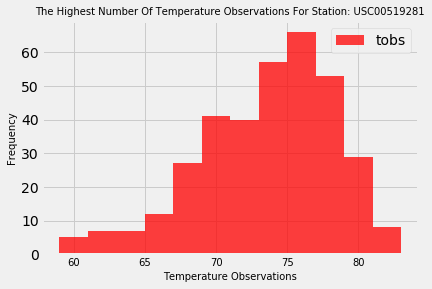

<Figure size 576x432 with 0 Axes>

In [27]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram

temp_data = temperature_df.plot.hist(bins=12, alpha=0.75, color='r')

plt.xlabel("Temperature Observations", fontsize=10)
plt.ylabel("Frequency", fontsize=10)
plt.title("The Highest Number Of Temperature Observations For Station: USC00519281", fontsize=10)
plt.xticks(fontsize=10)
plt.figure(figsize=(8,6))
plt.tight_layout()
plt.show()

## Bonus Challenge Assignment

In [28]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

[(62.0, 69.57142857142857, 74.0)]


In [29]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.

# the previous date from the last year data 
last_year_trip_begin_date = dt.datetime(2016,8,22)
last_year_trip_end_date = dt.datetime(2017,8,23)
results = calc_temps(last_year_trip_begin_date, last_year_trip_end_date)[0] #[0]firstcolumn[1]secondrow 
results
results_df = pd.DataFrame(results)
results_df

# def last_year_temp_data(start_date, end_date):
    
#     return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
#         filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

#     last_year_start_date = dt.date.strftime(last_begin_date, "%Y-%m-%d") - dt.date.timedelta(days=365).strftime("%Y-%m-%d")
#     last_year_end_date = dt.date.strftime(last_end_date, "%Y-%m-%d") - dt.date.timedelta(days=365).strftime("%Y-%m-%d")
#     return last_year_start_date, last_year_end_date

# last_year_temp_data(last_begin_date, last_end_date)
# lyr_start_date, lyr_end_date = last_year_temp_data(last_begin_date, last_end_date)
# tmin, tavg, tmax = lyr_start_date, lyr_end_date
# print(tmin, tavg, tmax)

,0
0,58.000000
1,74.590583
2,87.000000


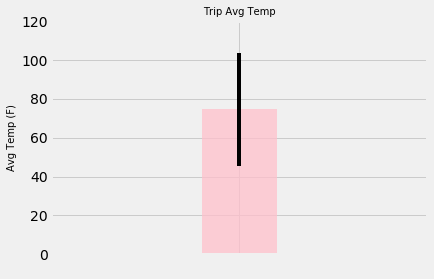

<Figure size 648x216 with 0 Axes>

In [30]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)
x_axis=" "
y_axis=results_df[0][1]
tmax=results_df[0][2]
tmin=results_df[0][0]
y_error=tmax-tmin


plt.bar(x_axis, y_axis, yerr=y_error, width=0.8, color='pink', alpha=0.75, align='center')
plt.xlim(-2,2)
plt.ylim(0,120)
plt.ylabel("Avg Temp (F)", fontsize=10)
plt.title("Trip Avg Temp", fontsize=10)
plt.figure(figsize=(9,3))
plt.tight_layout() 
plt.show()


In [31]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation

# joining two data 

join = [Measurement.prcp, Measurement.station, Station.station, Station.name, Station.longitude, Station.elevation,
         Measurement.date]
same_station = session.query(*join).filter(Station.station == Measurement.station).limit(10).all()

for data in same_station:
    (measurement_prcp, measurement_station, station_station, station_name, station_longitude, station_elevation,
    measurement_date) = data
    
#     print(f"station: {station_station} | station: {measurement_station}")


end_date = dt.datetime(2017,8,23)
begin_date = dt.datetime(2016,8,22)

total_rainfall_per_station_bydates = session.query(Measurement.station, Measurement.date, Measurement.prcp, 
                                                   Station.name, Station.latitude, Station.longitude, Station.elevation).\
                                      filter(Measurement.date <= end_date).\
                                      filter(Measurement.date >= begin_date).\
                                      order_by(Measurement.prcp.desc()).all()
                                      
total_rainfall_per_station_bydates_df = pd.DataFrame(total_rainfall_per_station_bydates)
total_rainfall_per_station_bydates_df.rename(columns={"station":"Station", "date":"Date", "prcp":"Rainfalls", 
                                       "name": "Station Name", "latitude": "Latitude", "longitude":"Longitude",
                                       "elevation":"Elevation"}).head()

,Station,Date,Rainfalls,Station Name,Latitude,Longitude,Elevation
0,USC00516128,2016-09-14,6.7,"WAIKIKI 717.2, HI US",21.2716,-157.8168,3.0
1,USC00516128,2016-09-14,6.7,"KANEOHE 838.1, HI US",21.4234,-157.8015,14.6
2,USC00516128,2016-09-14,6.7,"KUALOA RANCH HEADQUARTERS 886.9, HI US",21.5213,-157.8374,7.0
3,USC00516128,2016-09-14,6.7,"PEARL CITY, HI US",21.3934,-157.9751,11.9
4,USC00516128,2016-09-14,6.7,"UPPER WAHIAWA 874.3, HI US",21.4992,-158.0111,306.6


In [32]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

[(62.0, 69.15384615384616, 77.0)]

In [36]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

end_date = dt.datetime(2017,8,23)
begin_date = dt.datetime(2016,8,22)

# Set the start and end date of the trip
trip_start_year = '2016,08,22'
trip_end_year = '2016,08,25'

# Use the start and end date to create a range of dates
date_range = ['2016-08-22', '2016-08-23', '2016-08-24', '2016-08-24', '2016-08-24', '2016-08-25']

# Convert to the string format to datetime
dates_list = [dt.datetime.strptime(date, "%Y-%m-%d") for date in date_range]
dates_list

# Stip off the year and save a list of %m-%d strings
converted_dates = [date.strftime('%m-%d') for date in dates_list]
converted_dates

# Loop through the list of %m-%d strings and calculate the normals for each date
date_list = converted_dates
normals = [daily_normals(date) for date in date_list]
normals

[[(69.0, 76.47169811320755, 84.0)],
 [(67.0, 76.6923076923077, 87.0)],
 [(70.0, 75.96153846153847, 84.0)],
 [(70.0, 75.96153846153847, 84.0)],
 [(70.0, 75.96153846153847, 84.0)],
 [(69.0, 76.96078431372548, 82.0)]]

In [55]:
# Clean up the normal lists

clean_normals = [item for list in normals for item in list]
clean_normals

[(69.0, 76.47169811320755, 84.0),
 (67.0, 76.6923076923077, 87.0),
 (70.0, 75.96153846153847, 84.0),
 (70.0, 75.96153846153847, 84.0),
 (70.0, 75.96153846153847, 84.0),
 (69.0, 76.96078431372548, 82.0)]

In [75]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index
trip_dates=['2016-08-22', '2016-08-23', '2016-08-24', '2016-08-24', '2016-08-24', '2016-08-25']

query_results_df = pd.DataFrame(clean_normals, columns=["Tmin", "Tavg", "Tmax"], index=trip_dates)
# query_results_df.set_index('date')
query_results_df

,Tmin,Tavg,Tmax
2016-08-22,69.0,76.471698,84.0
2016-08-23,67.0,76.692308,87.0
2016-08-24,70.0,75.961538,84.0
2016-08-24,70.0,75.961538,84.0
2016-08-24,70.0,75.961538,84.0
2016-08-25,69.0,76.960784,82.0


(array([-1.,  0.,  1.,  2.,  3.,  4.,  5.,  6.]),
 <a list of 8 Text xticklabel objects>)

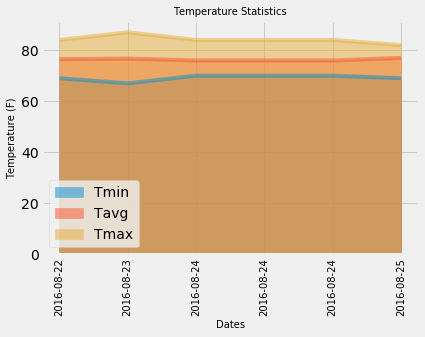

In [82]:
# Plot the daily normals as an area plot with `stacked=False`
daily_normals_plot = query_results_df.plot.area(stacked=False)
plt.xlabel("Dates", fontsize=10)
plt.ylabel("Temperature (F)", fontsize=10)
plt.title("Temperature Statistics", fontsize=10)
plt.xticks(rotation=90, fontsize=10)